In [96]:
!pip install praw --quiet
!pip install twython --quiet

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
You should consider upgrading via the 'c:\users\yjain7\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yjain7\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

# misc
import datetime as dt
from pprint import pprint
from itertools import chain
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import pandas as pd
import re
from datetime import datetime
# reddit crawler
import praw

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
#from wordcloud import WordCloud

C:\Users\yjain7\Anaconda3\lib\site-packages\fsspec\registry.py:188: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  minversions = {"s3fs": LooseVersion("0.3.0"), "gcsfs": LooseVersion("0.3.0")}
C:\Users\yjain7\Anaconda3\lib\site-packages\fsspec\registry.py:188: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  minversions = {"s3fs": LooseVersion("0.3.0"), "gcsfs": LooseVersion("0.3.0")}
C:\Users\yjain7\Anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\yjain7\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\yjain7\Anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutil

In [3]:
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yjain7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yjain7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yjain7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nlp = spacy.load("en_core_web_lg")

#documents = []
df= pd.read_csv("C:/Users/yjain7/Downloads/Output_full.csv")
#for index,row in df.iterrows():
    #nn=datetime.strptime(row['timestamp'], '%m/%d/%Y %H:%M')
    #if(nn.year<2020):
        #documents.append(row['msg_body'])

   

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#topics assigned
df['topic']=0
df.loc[df.comment_body.str.contains('stake|contract|claim', flags = re.IGNORECASE, na= False),'topic'] = 'wallet'
df.loc[df.comment_body.str.contains('moderator|compose|newbies',flags = re.IGNORECASE,na= False),'topic'] = 'Investing cautiously'
df.loc[df.comment_body.str.contains('metaverse|kraken|launch',flags = re.IGNORECASE,na= False),'topic'] = 'Metaverse Cryptocurrencies'

#remove topics where 0

df =  df.loc[~ df.topic.isin([0,'transport'])].reset_index(drop = True)
df

#before and after covid
df['covid'] = 0
df.loc[df['year'] < 2020,'covid'] ='before'
df.loc[df['year'] >=2020,'covid']='after'
df


C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,comment_id,comment_parent_id,comment_body,comment_link_id,year,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,topic,covid
0,ecy9rwo,t1_ecy9kit,\n__^[wow ^so ^verify]__: ^/u/tomcarbon ^-> ^/...,t3_ab7uj1,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Investing cautiously,before
1,ecxxl16,t3_ab70c5,Your post must contain at least some words. Tr...,t3_ab70c5,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Investing cautiously,before
2,ecxtr9g,t3_ab6d7f,"Hey there!\n\nI see you are new here, Welcome ...",t3_ab6d7f,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Investing cautiously,before
3,ecxc1g7,t3_ab3z7t,"Hey there!\n\nI see you are new here, Welcome ...",t3_ab3z7t,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Investing cautiously,before
4,ecx3ic7,t3_ab306v,"Hey there!\n\nI see you are new here, Welcome ...",t3_ab306v,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Investing cautiously,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,i4kbjdi,t1_i4kb02n,"Every wallet is a compromise between security,...",t3_u2qawj,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,wallet,after
618,i4kxnb3,t3_u2q6p3,I’m starting to believe it’ll never happen. St...,t3_u2q6p3,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,wallet,after
619,i4lwwbs,t1_i4kioyc,Biggest mistake of my investing career was sta...,t3_u2q6p3,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,wallet,after
620,i4mwrbr,t1_i4m039e,Yeah if you cant afford to leave the money the...,t3_u2q6p3,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,wallet,after


In [48]:
documents_ac = []
documents_bc = []
#df= pd.read_csv("/content/drive/MyDrive/Copy of Final_Dogecoin_data.csv")
for index,row in df.iterrows():
    #nn=datetime.strptime(row['year'], '%m/%d/%Y %H:%M')
    if(row['year']<2020 and row['topic'] == 'Investing cautiously'):
        documents_bc.append(row['comment_body'])
    elif(row['year']>=2020 and row['topic'] == 'Investing cautiously'):
        documents_ac.append(row['comment_body'])
            

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# create lists of the information from each news
title1 = documents_bc
title2 = documents_ac

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
title1

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['\n__^[wow ^so ^verify]__: ^/u/tomcarbon ^-> ^/u/apocrathia ^__10.0__ ^__doge__ ^__($0.02)__ ^[[help]](https://www.reddit.com/message/compose?to=sodogetip&amp;subject=%2Bhelp&amp;message=%2Bhelp)  ^[[transaction]](https://chain.so/tx/DOGE/f33610bdbb3e662844dd6b7f828cc48e7377808de9d2dc4ccce1190f0d0e1135)\n',
 'Your post must contain at least some words. Try again\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/dogecoin) if you have any questions or concerns.*',
 'Hey there!\n\nI see you are new here, Welcome to /r/dogecoin. How did you find out about Dogecoin?\n\nDo you have any questions you need answered to help get you started?  \n\nHere are some handy links:\n\n[Getting Started](http://dogecoin.com/getting-started/)\n\n[Using SoDogeTip](/r/sodogetip/wiki/index)\n\n[List of Faucets](/r/dogecoin/wiki/faucets)\n\n[Wallet Help - ELI5](https://redd.it/3b3h5d/)\n\nPlease check the information on the si

In [51]:
news1 = pd.DataFrame({
    "title": title1,
})
news1.head()
news2 = pd.DataFrame({
    "title": title2,
})
news2.head()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title
0,Your post must contain at least some words. Tr...
1,"Hey there!\n\nI see you are new here, Welcome ..."
2,"Hey there!\n\nI see you are new here, Welcome ..."
3,WARNING. NEW ACCOUNT DETECTED. IS THIS PERSON ...
4,Looks like a repost. I've seen this image 11 t...


In [52]:
title2

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Your post must contain at least some words. Try again\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/dogecoin) if you have any questions or concerns.*',
 'Hey there!\n\nI see you are new here, Welcome to /r/dogecoin. How did you find out about Dogecoin?\n\nDo you have any questions you need answered to help get you started?  \n\nHere are some handy links:\n\n[Getting Started](http://dogecoin.com/getting-started/)\n\n[Using SoDogeTip](/r/sodogetip/wiki/index)\n\n[List of Faucets](/r/dogecoin/wiki/faucets)\n\n[Wallet Help - ELI5](https://redd.it/3b3h5d/)\n\nPlease check the information on the sidebar -->>\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/dogecoin) if you have any questions or concerns.*',
 'Hey there!\n\nI see you are new here, Welcome to /r/dogecoin. How did you find out about Dogecoin?\n\nDo you h

In [53]:
sid = SentimentIntensityAnalyzer()

pos_text = "Vader is awesome"
cap_pos_text = "Vader is AWESOME!" # captilization and ! increases the effect
neg_text = "Vader is bad"

print(sid.polarity_scores(pos_text))
print(sid.polarity_scores(cap_pos_text))
print(sid.polarity_scores(neg_text))

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.281, 'pos': 0.719, 'compound': 0.729}
{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}


In [54]:
res1 = [*news1['title'].apply(sid.polarity_scores)]
pprint(res1[:3])
res2 = [*news2['title'].apply(sid.polarity_scores)]
pprint(res2[:3])

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.3182, 'neg': 0.0, 'neu': 0.933, 'pos': 0.067},
 {'compound': 0.9158, 'neg': 0.0, 'neu': 0.837, 'pos': 0.163}]
[{'compound': 0.3182, 'neg': 0.0, 'neu': 0.933, 'pos': 0.067},
 {'compound': 0.9158, 'neg': 0.0, 'neu': 0.837, 'pos': 0.163},
 {'compound': 0.9158, 'neg': 0.0, 'neu': 0.837, 'pos': 0.163}]


In [55]:
sentiment_df1 = pd.DataFrame.from_records(res1)
news1 = pd.concat([news1, sentiment_df1], axis=1, join='inner')
news1.head()
sentiment_df2 = pd.DataFrame.from_records(res2)
news2 = pd.concat([news2, sentiment_df2], axis=1, join='inner')
news2.head()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,neg,neu,pos,compound
0,Your post must contain at least some words. Tr...,0.000,0.933,0.067,0.3182
1,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158
2,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158
3,WARNING. NEW ACCOUNT DETECTED. IS THIS PERSON ...,0.049,0.822,0.129,0.8426
4,Looks like a repost. I've seen this image 11 t...,0.030,0.883,0.086,0.5663


In [56]:
THRESHOLD = 0.2

conditions = [
    (news1['compound'] <= -THRESHOLD),
    (news1['compound'] > -THRESHOLD) & (news1['compound'] < THRESHOLD),
    (news1['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
news1['label'] = np.select(conditions, values)

news1

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,neg,neu,pos,compound,label
0,\n__^[wow ^so ^verify]__: ^/u/tomcarbon ^-> ^/...,0.000,1.000,0.000,0.0000,neu
1,Your post must contain at least some words. Tr...,0.000,0.933,0.067,0.3182,pos
2,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158,pos
3,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158,pos
4,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158,pos
...,...,...,...,...,...,...
67,"Hi u/Cynic_Custodian, thanks for tipping u/cry...",0.158,0.755,0.088,-0.5152,neg
68,Your submission has been flagged for removal b...,0.000,1.000,0.000,0.0000,neu
69,**Dollar cost averaging**\n\nDollar cost avera...,0.032,0.920,0.048,0.3094,pos
70,It seems you are posting content related to pr...,0.030,0.843,0.127,0.7845,pos


In [57]:
news1['compound']

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     0.0000
1     0.3182
2     0.9158
3     0.9158
4     0.9158
       ...  
67   -0.5152
68    0.0000
69    0.3094
70    0.7845
71    0.6214
Name: compound, Length: 72, dtype: float64

In [58]:
THRESHOLD1 = 0.2

conditions1 = [
    (news2['compound'] <= -THRESHOLD1),
    (news2['compound'] > -THRESHOLD1) & (news2['compound'] < THRESHOLD1),
    (news2['compound'] >= THRESHOLD1),
    ]

values = ["neg", "neu", "pos"]
news2['label'] = np.select(conditions1, values)

news2.head()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,neg,neu,pos,compound,label
0,Your post must contain at least some words. Tr...,0.000,0.933,0.067,0.3182,pos
1,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158,pos
2,"Hey there!\n\nI see you are new here, Welcome ...",0.000,0.837,0.163,0.9158,pos
3,WARNING. NEW ACCOUNT DETECTED. IS THIS PERSON ...,0.049,0.822,0.129,0.8426,pos
4,Looks like a repost. I've seen this image 11 t...,0.030,0.883,0.086,0.5663,pos


In [59]:
sentence0 = news1.title.iloc[1]
words0 = news1.title.iloc[1].split()
sentence0
words0

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Your',
 'post',
 'must',
 'contain',
 'at',
 'least',
 'some',
 'words.',
 'Try',
 'again',
 '*I',
 'am',
 'a',
 'bot,',
 'and',
 'this',
 'action',
 'was',
 'performed',
 'automatically.',
 'Please',
 '[contact',
 'the',
 'moderators',
 'of',
 'this',
 'subreddit](/message/compose/?to=/r/dogecoin)',
 'if',
 'you',
 'have',
 'any',
 'questions',
 'or',
 'concerns.*']

In [60]:
sentence0 = news1.title.iloc[0]
words0 = news1.title.iloc[0].split()

pos_list = []
neg_list = []
neu_list = []

for word in words0:
  if (sid.polarity_scores(word)['compound']) >= THRESHOLD:
    pos_list.append(word)
  elif (sid.polarity_scores(word)['compound']) <= -THRESHOLD:
    neg_list.append(word)
  else:
    neu_list.append(word)                

print('Positive:',pos_list)        
print('Neutral:',neu_list)    
print('Negative:',neg_list) 
score = sid.polarity_scores(sentence0)

print(f"\nThis sentence is {score['neg']}% negative")
print(f"This sentence is {score['neu']}% neutral")
print(f"This sentence is {score['pos']}% positive")
print(f"The compound value : {score['compound']} <= THRESHOLD")
print(f"This sentence is NEGATIVE")

# source https://stackoverflow.com/a/51515048/11386747

Positive: []
Neutral: ['__^[wow', '^so', '^verify]__:', '^/u/tomcarbon', '^->', '^/u/apocrathia', '^__10.0__', '^__doge__', '^__($0.02)__', '^[[help]](https://www.reddit.com/message/compose?to=sodogetip&amp;subject=%2Bhelp&amp;message=%2Bhelp)', '^[[transaction]](https://chain.so/tx/DOGE/f33610bdbb3e662844dd6b7f828cc48e7377808de9d2dc4ccce1190f0d0e1135)']
Negative: []

This sentence is 0.0% negative
This sentence is 1.0% neutral
This sentence is 0.0% positive
The compound value : 0.0 <= THRESHOLD
This sentence is NEGATIVE


C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
neg_list

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [117]:
news1.label.value_counts()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pos    33
neu    25
neg    14
Name: label, dtype: int64

In [118]:
news2.label.value_counts()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pos    117
neg      8
neu      6
Name: label, dtype: int64

In [119]:
type(news1.label)
count_positive=0
Pos = pd.Series(news1['label']=='pos')
Positive=Pos.value_counts()
Positive
#count=Positive/news.label
#Positive.value_counts()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    39
True     33
Name: label, dtype: int64

In [120]:
news2.label.value_counts()
news2.value_counts()

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([[1.73611111, 0.        , 0.        , 0.        , 0.        ,
         2.29166667, 0.        , 0.        , 0.        , 0.97222222],
        [0.22900763, 0.        , 0.        , 0.        , 0.        ,
         4.46564885, 0.        , 0.        , 0.        , 0.30534351]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

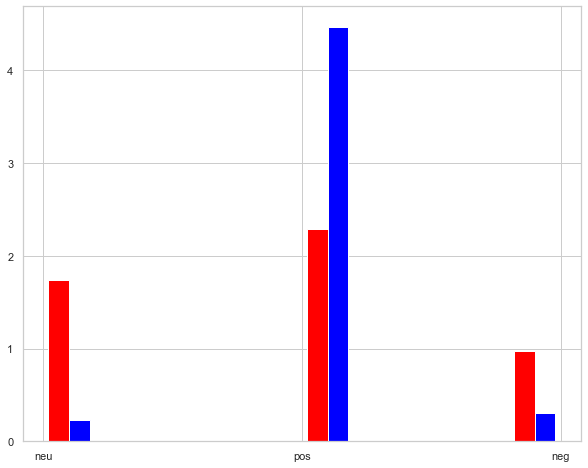

In [121]:
plt.hist([news1.label,news2.label],color=['r','b'],density=True)

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<matplotlib.patches.Wedge at 0x2468d506100>,
 [Text(0.14357877740594222, 1.0905893519921306, 'positive'),
  Text(-0.7431492115034988, -0.8110050859530588, 'neutral'),
  Text(0.9010672421543007, -0.6309340893599291, 'negative')],
 [Text(0.07831569676687757, 0.5948669192684347, '45.8%'),
  Text(-0.4053541153655447, -0.4423664105198502, '34.7%'),
  Text(0.4914912229932549, -0.34414586692359767, '19.4%')])

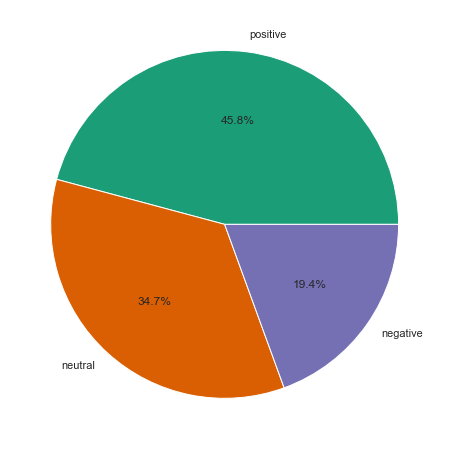

In [122]:
plt.pie(news1.label.value_counts(),labels=['positive','neutral','negative'],autopct='%1.1f%%')

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<matplotlib.patches.Wedge at 0x246b82529a0>,
 [Text(-1.0385824443111964, 0.3624175856226915, 'positive'),
  Text(0.9758810249112128, -0.5075984881953858, 'negative'),
  Text(1.0886322879419064, -0.1577331342818318, 'neutral')],
 [Text(-0.5664995150788343, 0.197682319430559, '89.3%'),
  Text(0.5322987408606614, -0.27687190265202855, '6.1%'),
  Text(0.5937994297864944, -0.08603625506281734, '4.6%')])

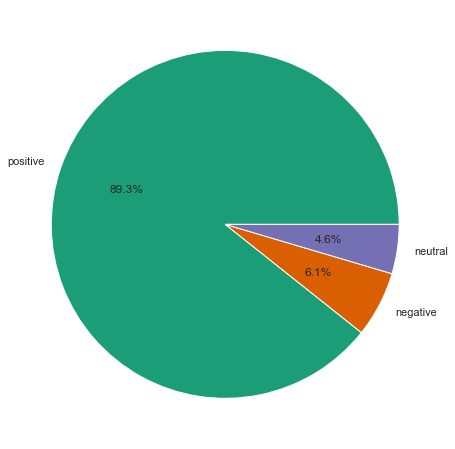

In [123]:
plt.pie(news2.label.value_counts(),labels=['positive','negative','neutral'],autopct='%1.1f%%')

In [258]:
def news_title_output(df, label):
  res = df[df['label'] == label].title.values
  print(f'{"=" * 20}')
  print("\n".join(title for title in res))

# randomly sample
news_sub = news.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
news_title_output(news_sub, "pos")

print("\nNeutral news")
news_title_output(news_sub, "neu")

print("\nNegative news")
news_title_output(news_sub, "neg")

C:\Users\yjain7\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'news' is not defined

In [19]:
text = "Let's see how the NLTK tokenizer works!"

# using word tokenizer
print(nltk.word_tokenize(text))

# using regexp tokenizer
tk = nltk.tokenize.RegexpTokenizer(r'\s+', gaps=True) # split on whitespace
print(tk.tokenize(text))

tk = nltk.tokenize.RegexpTokenizer(r'\w+') # remove punct
print(tk.tokenize(text))

['Let', "'s", 'see', 'how', 'the', 'NLTK', 'tokenizer', 'works', '!']
["Let's", 'see', 'how', 'the', 'NLTK', 'tokenizer', 'works!']
['Let', 's', 'see', 'how', 'the', 'NLTK', 'tokenizer', 'works']


In [20]:
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:5])

179
['i', 'me', 'my', 'myself', 'we']


In [21]:
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words

print(custom_tokenize(text))

['lets', 'see', 'nltk', 'tokenizer', 'works']


In [22]:
def tokens_2_words(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

pos_words = tokens_2_words(news, 'pos')
neg_words = tokens_2_words(news, 'neg')

In [23]:
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(20)

[('bitcoin', 131),
 ('like', 33),
 ('crypto', 20),
 ('000', 20),
 ('btc', 19),
 ('1', 18),
 ('worth', 15),
 ('new', 15),
 ('get', 15),
 ('years', 15),
 ('time', 14),
 ('year', 14),
 ('would', 13),
 ('today', 13),
 ('bitcoins', 12),
 ('best', 12),
 ('3', 11),
 ('buy', 10),
 ('free', 10),
 ('one', 10)]

In [24]:
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(20)

[('bitcoin', 57),
 ('ban', 9),
 ('btc', 9),
 ('000', 9),
 ('bank', 8),
 ('money', 8),
 ('dont', 7),
 ('stop', 6),
 ('used', 6),
 ('cash', 6),
 ('bought', 5),
 ('day', 5),
 ('old', 5),
 ('going', 5),
 ('time', 5),
 ('next', 5),
 ('coinbase', 5),
 ('crypto', 5),
 ('ago', 5),
 ('robinhood', 4)]